DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [5]:
# structured data -> file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline


In [6]:
##2- perform Explanatory Data Analysis
# check for NANs
# fill null values if needed
# outliers
# descriptive
# correlation
# type of data (numerical, nominal, categorical)
# biased, unbiased

In [7]:
df = pd.read_csv('loan_data.csv')

In [8]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [9]:
df.shape

(9578, 14)

In [10]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


array([[<AxesSubplot:title={'center':'credit.policy'}>,
        <AxesSubplot:title={'center':'int.rate'}>,
        <AxesSubplot:title={'center':'installment'}>,
        <AxesSubplot:title={'center':'log.annual.inc'}>],
       [<AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'fico'}>,
        <AxesSubplot:title={'center':'days.with.cr.line'}>,
        <AxesSubplot:title={'center':'revol.bal'}>],
       [<AxesSubplot:title={'center':'revol.util'}>,
        <AxesSubplot:title={'center':'inq.last.6mths'}>,
        <AxesSubplot:title={'center':'delinq.2yrs'}>,
        <AxesSubplot:title={'center':'pub.rec'}>],
       [<AxesSubplot:title={'center':'not.fully.paid'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

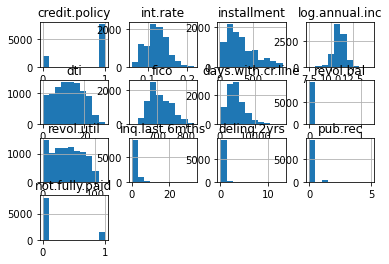

In [11]:
df.hist()

(array([1868.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7710.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

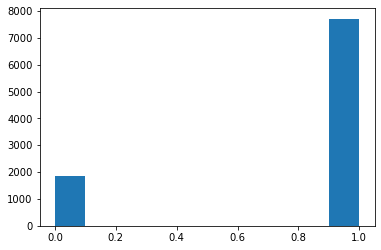

In [12]:
plt.hist(df['credit.policy'])

In [13]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [14]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [15]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [16]:
### Feature Transformation 
#1 transform categorical into numerical values

df['purpose']=df['purpose'].map({'debt_consolidation':0,'credit_card':1,'all_other':2,'home_improvement':3,'small_business':4,'major_purchase':5,'educational':6}).astype(int)
df.head()

## 2 EDA - see above

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:>

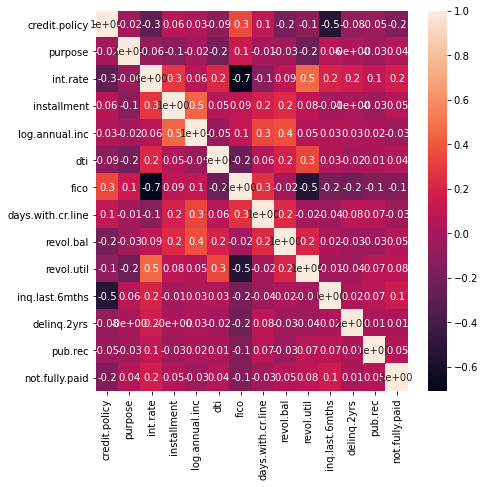

In [17]:
# 3 Additional Feature Engineering
#You will check the correlation between features and will drop those features which have a strong correlation
#This will help reduce the number of features and will leave you with the most relevant features

plt.figure(figsize=(7,7))
sns.heatmap(np.round(df.corr(),2), annot=True, fmt='0.1')


In [18]:
# dropping colums with significant correlation
df2 = df.drop(columns = 'fico')

# dropping the output column from the input df
X_temp = df2.drop(columns = 'credit.policy')

# creating the output vector
y = df['credit.policy']

<AxesSubplot:>

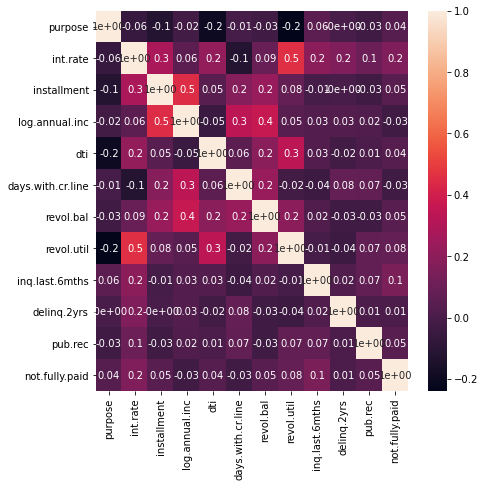

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(np.round(X_temp.corr(),2), annot=True, fmt='0.1')



In [20]:
X_temp.shape

(9578, 12)

In [21]:
# dropping colums with significant correlation
X = X_temp.drop(columns = ['revol.util']) # not dropping 'log.annual.inc'

X = np.asarray(X).astype('float32')

<AxesSubplot:>

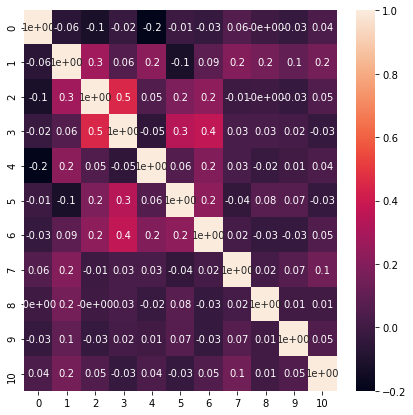

In [22]:
plt.figure(figsize=(7,7))
sns.heatmap(np.round(pd.DataFrame(X).corr(),2), annot=True, fmt='0.1')



In [23]:
# 4
# Modeling
# After applying EDA and feature engineering, you are now ready to build the predictive models
# In this part, you will create a deep learning model using Keras with Tensorflow backend

In [27]:
#split and standardise the data
# creating the train and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X_train)
X_train_std = st.transform(X_train)
X_test_std = st.transform(X_test)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

# building multilayer perceptron model
from tensorflow.keras.layers import Dense

# different activation functions
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

from tensorflow.keras.metrics import Precision,Recall

from livelossplot import PlotLossesKerasTF

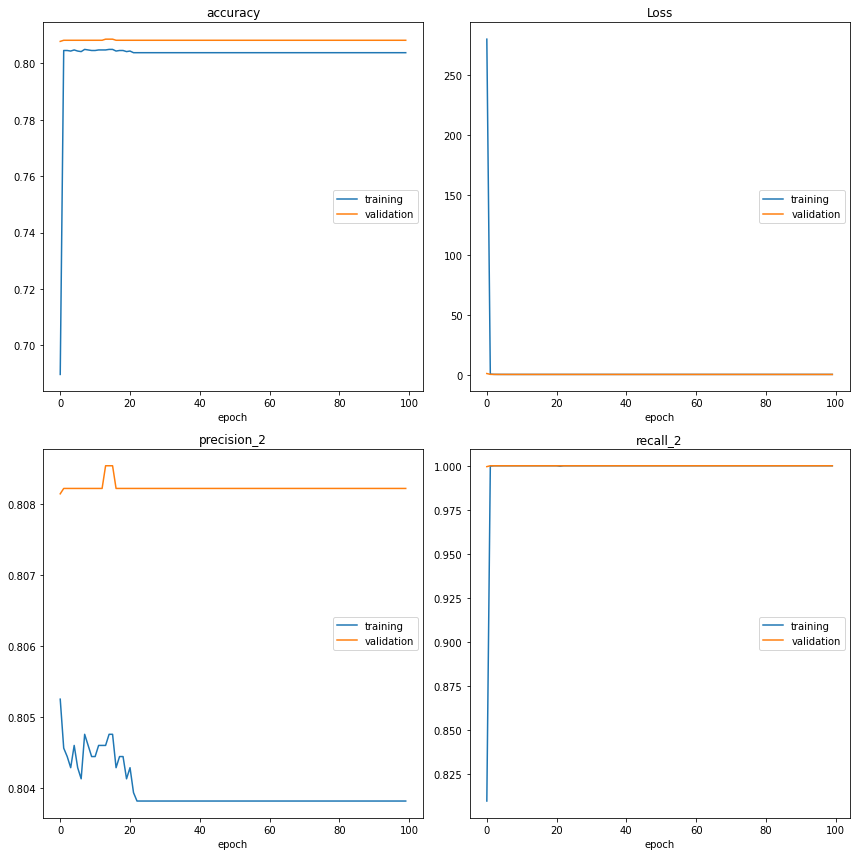

accuracy
	training         	 (min:    0.690, max:    0.805, cur:    0.804)
	validation       	 (min:    0.808, max:    0.809, cur:    0.808)
Loss
	training         	 (min:    0.493, max:  280.015, cur:    0.495)
	validation       	 (min:    0.488, max:    1.240, cur:    0.489)
precision_2
	training         	 (min:    0.804, max:    0.805, cur:    0.804)
	validation       	 (min:    0.808, max:    0.809, cur:    0.808)
recall_2
	training         	 (min:    0.810, max:    1.000, cur:    1.000)
	validation       	 (min:    1.000, max:    1.000, cur:    1.000)
514/514 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.8038 - precision_2: 0.8038 - recall_2: 1.0000 - val_loss: 0.4888 - val_accuracy: 0.8082 - val_precision_2: 0.8082 - val_recall_2: 1.0000


In [29]:
# create model 

classifier=Sequential()
# one layer after the other

# Adding the input layer and the first hidden layer
classifier.add(Dense(8,activation='relu',
                     input_dim = 11))
#classifier.add(Dropout(0.3))

# Adding the second hidden layer; 6 neurons
# we wouldn't use relu in text classification
classifier.add(Dense(units = 6, activation='relu'))

# 4 neurons
classifier.add(Dense(units = 4, activation='relu'))

# Adding the third hidden layer; 2 neurons
classifier.add(Dense(units = 2, activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer;
# binary classification # of neurons = 1 incl. sigmoid
# multi output case would require 2+ neurons and different activation function, eg. softmax
classifier.add(Dense(units = 1,  activation = 'sigmoid',))

# Compiling the ANN
classifier.compile(optimizer = 'adam', #RMSProp, softmax if multi
                   loss = 'binary_crossentropy', 
                   metrics =['accuracy', Precision(), Recall()])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100,callbacks = [PlotLossesKerasTF()], validation_data = (X_test_std, y_test))


In [30]:
# Epoch 97/100
# 514/514 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.8038 - precision: 0.8038 - recall: 1.0000 - val_loss: 0.4888 - val_accuracy: 0.8082 - val_precision: 0.8082 - val_recall: 1.0000
#Epoch 98/100
#514/514 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.8038 - precision: 0.8038 - recall: 1.0000 - val_loss: 0.4888 - val_accuracy: 0.8082 - val_precision: 0.8082 - val_recall: 1.0000
#Epoch 99/100
#514/514 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.8038 - precision: 0.8038 - recall: 1.0000 - val_loss: 0.4888 - val_accuracy: 0.8082 - val_precision: 0.8082 - val_recall: 1.0000
#Epoch 100/100
#514/514 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.8038 - precision: 0.8038 - recall: 1.0000 - val_loss: 0.4888 - val_accuracy: 0.8082 - val_precision: 0.8082 - val_recall: 1.0000

#results accuracy 80% is high
# precision 80% high

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 96        
                                                                 
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
 dense_12 (Dense)            (None, 4)                 28        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 191
Trainable params: 191
Non-trainable 